<a href="https://colab.research.google.com/github/AntonioFialhoSN/atv3_python_regression_multi/blob/main/atv3_python_regression_multi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Redes Neurais

## Criação do dataset

In [ ]:
list_ex1data2 = [[2104,3,399900],
[1600,3,329900],
[2400,3,369000],
[1416,2,232000],
[3000,4,539900],
[1985,4,299900],
[1534,3,314900],
[1427,3,198999],
[1380,3,212000],
[1494,3,242500],
[1940,4,239999],
[2000,3,347000],
[1890,3,329999],
[4478,5,699900],
[1268,3,259900],
[2300,4,449900],
[1320,2,299900],
[1236,3,199900],
[2609,4,499998],
[3031,4,599000],
[1767,3,252900],
[1888,2,255000],
[1604,3,242900],
[1962,4,259900],
[3890,3,573900],
[1100,3,249900],
[1458,3,464500],
[2526,3,469000],
[2200,3,475000],
[2637,3,299900],
[1839,2,349900],
[1000,1,169900],
[2040,4,314900],
[3137,3,579900],
[1811,4,285900],
[1437,3,249900],
[1239,3,229900],
[2132,4,345000],
[4215,4,549000],
[2162,4,287000],
[1664,2,368500],
[2238,3,329900],
[2567,4,314000],
[1200,3,299000],
[852,2,179900],
[1852,4,299900],
[1203,3,239500]]

# Criar e salvar o arquivo no Colab
file_name = "ex1data2.txt"
with open(file_name, "w") as f:
    for row in list_ex1data2:
        f.write(','.join(map(str, row)) + '\n')

print(f"Arquivo '{file_name}' salvo com sucesso!")

Arquivo 'ex1data2.txt' salvo com sucesso!


##compute_cost_multi.py


In [ ]:
# Functions/compute_cost_multi.py
"""
@file compute_cost_multi.py
@brief Computes the cost for multivariate linear regression.
@details Este módulo contém uma função para calcular o custo de um modelo de regressão linear
          multivariada utilizando a função de custo de erro quadrático médio.
@author Your Name <your.email@example.com>
"""

import numpy as np


def compute_cost_multi(X, y, theta):
    """
    Calcula o custo para regressão linear multivariada.

    A função de custo é definida como:
        J(θ) = (1 / (2m)) * (Xθ - y)ᵀ (Xθ - y)

    :param (ndarray) X: Matriz de features incluindo o termo de intercepto (shape: m × n+1).
    :param (ndarray) y: Vetor de valores alvo (shape: m,).
    :param (ndarray) theta: Vetor de parâmetros (shape: n+1,).
    :return (float): Valor do custo calculado.
    """

    # Verificações de formato
    #assert X.ndim == 2, "X deve ser matriz 2D"
    #assert y.ndim == 1, "y deve ser vetor 1D"
    #assert theta.ndim == 1, "theta deve ser vetor 1D"
    #assert X.shape[0] == y.shape[0], "X e y devem ter mesmo número de amostras"
    #assert X.shape[1] == theta.shape[0], "Número de features em X deve match com theta"


    # get the number of training examples
    m = len(y)

    # compute the predictions using the linear model by formula h(θ) = X @ θ
    # where @ is the matrix multiplication operator
    predictions = X @ theta

    # compute the error vector between predictions and actual values
    # The error is the difference between the predicted values and the actual values
    errors = predictions - y

    # compute the cost as the mean squared error cost function using the formula in the docstring
    cost = (1 / (2 * m)) * np.sum(errors ** 2)

    return cost


##features_normalize.py

In [ ]:
# Functions/feature_normalize.py
"""
@file features_normalizes.py
@brief Funções para normalização de features em datasets.
@details Este módulo contém funções para normalizar as features de um dataset
          utilizando diferentes abordagens, como média e desvio padrão, ou
          mínimo e máximo.
@author Your Name <your.email@example.com>
"""
import numpy as np


def features_normalize_by_std(X):
    """
    Normaliza as features de um dataset para média zero e desvio padrão unitário.
    Matematicamente, a formula utilizada é:
        X_norm = (X - mu) / sigma
    onde:
        - X é a matriz de entrada (m x n) onde m é o número de amostras e n é o número de features.
        - mu é o vetor de médias (1 x n) de cada feature.
        - sigma é o vetor de desvios padrão (1 x n) de cada feature.

    :param (ndarray) X: Matriz de entrada onde cada linha é uma amostra e cada coluna é uma feature.
    :return (tuple): Uma tripla contendo:
        - X_norm (ndarray): Matriz normalizada.
        - mu (ndarray): Vetor com as médias de cada feature.
        - sigma (ndarray): Vetor com os desvios padrão de cada feature.
    """
    # Calcula a média de cada feature (coluna)
    mu = np.mean(X, axis=0)

    # Calcula o desvio padrão de cada feature (coluna)
    sigma = np.std(X, axis=0)

    # Evita divisão por zero
    sigma[sigma == 0] = 1

    # Normaliza as features
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma


def features_normalizes_by_min_max(X):
    """
    Normaliza as features de um dataset para o intervalo [0, 1] utilizando o mínimo e o máximo.
    Matematicamente, a formula utilizada é:
        X_norm = (X - min) / (max - min)
    onde:
        - X é a matriz de entrada (m x n) onde m é o número de amostras e n é o número de features.
        - min é o vetor de mínimos (1 x n) de cada feature.
        - max é o vetor de máximos (1 x n) de cada feature.

    :param (ndarray) X: Matriz de entrada onde cada linha é uma amostra e cada coluna é uma feature.
    :return (tuple): Uma tupla contendo:
        - X_norm (ndarray): Matriz normalizada.
        - min (ndarray): Vetor com os valores mínimos de cada feature.
        - max (ndarray): Vetor com os valores máximos de cada feature.
    """
    # Calcula o mínimo de cada feature (coluna)
    min = np.min(X, axis=0)

    # Calcula o máximo de cada feature (coluna)
    max = np.max(X, axis=0)

    # Evita divisão por zero
    range_ = max - min
    range_[range_ == 0] = 1

    # Normaliza as features
    X_norm = (X - min) / range_

    return X_norm, min, max


##gradient_descent_multi.py

In [ ]:
# Functions/gradient_descent_multi.py
"""
@file gradient_descent_multi.py
@brief Performs gradient descent for multivariate regression.
@details Este módulo contém uma função para executar o gradiente descendente
          para regressão linear multivariada, atualizando os parâmetros θ
          iterativamente para minimizar a função de custo.
@author Your Name <your.email@example.com>
"""

import numpy as np


def gradient_descent_multi(X, y, theta, alpha, num_iters):
    """
    Executa o gradiente descendente para aprender os parâmetros θ.

    Atualiza θ realizando num_iters passos de gradiente com taxa de aprendizado α usando a fórmula:
        θ := θ - α * (1/m) * (Xᵀ * (Xθ - y))
    onde:
        - θ é o vetor de parâmetros (n+1,).
        - m é o número de amostras.
        - X é a matriz de features (m × n+1).
        - y é o vetor de valores alvo (m,).
        - α é a taxa de aprendizado.

    :param (ndarray) X: Matriz de features com termo de bias (shape: m × n+1).
    :param (ndarray) y: Vetor de valores alvo (shape: m,).
    :param (ndarray) theta: Vetor de parâmetros iniciais (shape: n+1,).
    :param (float) alpha: Taxa de aprendizado.
    :param (int) num_iters: Número de iterações.
    :return (tuple): Uma tupla com 2 elementos contendo:
        - theta (ndarray): Parâmetros aprendidos (shape: n+1,).
        - J_history (ndarray): Custo em cada iteração (shape: num_iters,).
    """
    # obtenha o número de exemplos de treinamento
    m = len(y)

    # inicialize o vetor de custo para armazenar o custo em cada iteração com 0s
    J_history = np.zeros(num_iters)

    # loop para atualizar os parâmetros θ usando o gradiente descendente
    for i in range(num_iters):
        # calcule o erro entre as previsões e os valores reais
        error = X.dot(theta) - y

        # calcule o gradiente para atualizar os parâmetros θ
        gradient = (1/m) * X.T.dot(error)

        # Atualize os parâmetros θ
        theta = theta - alpha * gradient


        # Calcule o custo atual e armazene-o no vetor J_history
        J_history[i] = compute_cost_multi(X, y, theta)

    return theta, J_history


def gradient_descent_multi_with_history(X, y, theta, alpha, num_iters):
    """
    Executa o gradiente descendente para aprender os parâmetros θ.

    Atualiza θ realizando num_iters passos de gradiente com taxa de aprendizado α usando a fórmula:
        θ := θ - α * (1/m) * (Xᵀ * (Xθ - y))
    onde:
        - θ é o vetor de parâmetros (n+1,).
        - m é o número de amostras.
        - X é a matriz de features (m × n+1).
        - y é o vetor de valores alvo (m,).
        - α é a taxa de aprendizado.

    :param (ndarray) X: Matriz de features com termo de bias (shape: m × n+1).
    :param (ndarray) y: Vetor de valores alvo (shape: m,).
    :param (ndarray) theta: Vetor de parâmetros iniciais (shape: n+1,).
    :param (float) alpha: Taxa de aprendizado.
    :param (int) num_iters: Número de iterações.
    :return (tuple): Uma tupla com 2 elementos contendo:
        - theta (ndarray): Parâmetros aprendidos (shape: n+1,).
        - J_history (ndarray): Custo em cada iteração (shape: num_iters,).
        - theta_history (ndarray): Histórico dos parâmetros θ em cada iteração (shape: num_iters × n+1).
    """
    # obtenha o número de exemplos de treinamento
    m = len(y)

    # obtenha o número de parâmetros
    n = len(theta)

    # inicialize o vetor de custo para armazenar o custo em cada iteração com 0s
    J_history = np.zeros(num_iters)

    # inicialize o vetor de histórico de parâmetros
    theta_history = np.zeros((num_iters + 1, n))

    # armazene os parâmetros iniciais
    theta_history[0] = theta.copy()

    # loop para atualizar os parâmetros θ usando o gradiente descendente
    for i in range(num_iters):
        # calcule o erro entre as previsões e os valores reais
        error = X.dot(theta) - y

        # calcule o gradiente para atualizar os parâmetros θ
        gradient = (1/m) * X.T.dot(error)

        # Atualize os parâmetros θ
        theta = theta - alpha * gradient

        # Calcule o custo atual e armazene-o no vetor J_history
        J_history[i] = compute_cost_multi(X, y, theta)

        # Armazene os parâmetros θ atuais no vetor de histórico de parâmetros
        theta_history[i+1] = theta.copy()

    return theta, J_history, theta_history

##normal_eqn.py

In [ ]:
# Functions/normal_eqn.py
"""
@file normal_eqn.py
@brief Calcula os parâmetros θ usando a Equação Normal.
@details Este módulo contém uma função para calcular os parâmetros de um modelo
          de regressão linear utilizando a equação normal.
@author Your Name <your.email@example.com>
"""

import numpy as np


def normal_eqn(X, y):
    """
    Resolve os parâmetros θ utilizando a equação normal.

    A equação normal é definida como:
        θ = (XᵀX)⁻¹ Xᵀ y

    :param (ndarray) X: Matriz de features com bias, onde cada linha é uma amostra
                        e cada coluna é uma feature (shape: m × n+1).
    :param (ndarray) y: Vetor de valores alvo (shape: m,).
    :return (ndarray): Vetor de parâmetros θ (shape: n+1,).
    """
    # Calcula os parâmetros θ utilizando a equação normal
    # A equação normal é uma solução fechada para o problema de regressão linear
    # que minimiza a soma dos erros quadráticos entre as previsões e os valores reais
    # Implemente aqui a equação normal descrita na docstring. Use a função np.linalg.pinv
    # para calcular a pseudo-inversa de uma matriz, que é útil quando a matriz não é quadrada
    # ou não é invertível.
    # A pseudo-inversa é uma generalização da inversa de uma matriz e pode ser usada para resolver
    # sistemas de equações lineares que não têm uma solução única ou que são mal condicionados.
    return np.linalg.pinv(X.T @ X) @ X.T @ y


##regressao-multivariada-ex.py

Primeiros 10 exemplos de treinamento:
[[2.10400e+03 3.00000e+00 3.99900e+05]
 [1.60000e+03 3.00000e+00 3.29900e+05]
 [2.40000e+03 3.00000e+00 3.69000e+05]
 [1.41600e+03 2.00000e+00 2.32000e+05]
 [3.00000e+03 4.00000e+00 5.39900e+05]
 [1.98500e+03 4.00000e+00 2.99900e+05]
 [1.53400e+03 3.00000e+00 3.14900e+05]
 [1.42700e+03 3.00000e+00 1.98999e+05]
 [1.38000e+03 3.00000e+00 2.12000e+05]
 [1.49400e+03 3.00000e+00 2.42500e+05]]

Parâmetros de normalização:
Média (mu): [2000.68085106    3.17021277]
Desvio Padrão (sigma): [7.86202619e+02 7.52842809e-01]

Rodando GD para regressão multivariada...
Taxa de aprendizado (α): 0.01
Número de iterações: 400
Parâmetros iniciais (θ): [0. 0. 0.]

Theta via Gradient Descent:
[334302.06399328  99411.44947359   3267.01285407]


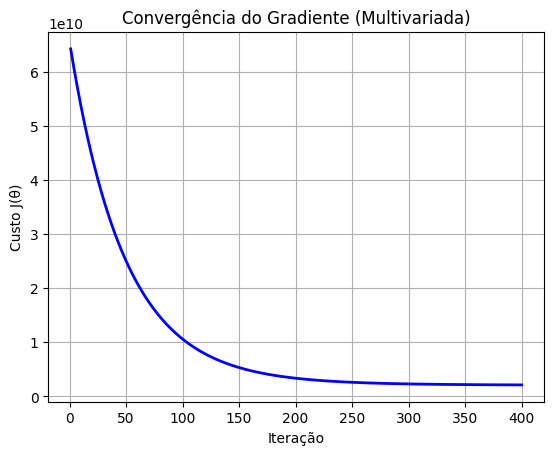


Preço previsto (GD) para [1650,3]: $289221.55

Theta via Equação Normal:
[89597.90954355   139.21067402 -8738.01911255]
Preço previsto (NE) para [1650,3]: $293081.46

[CUSTO ERRADO] Custo usando θ_ne em X_NORMALIZADO (X_b): 39606006377.94
[CUSTO CORRETO] Custo usando θ_ne em X_ORIGINAL (X_ne): 2043280050.60


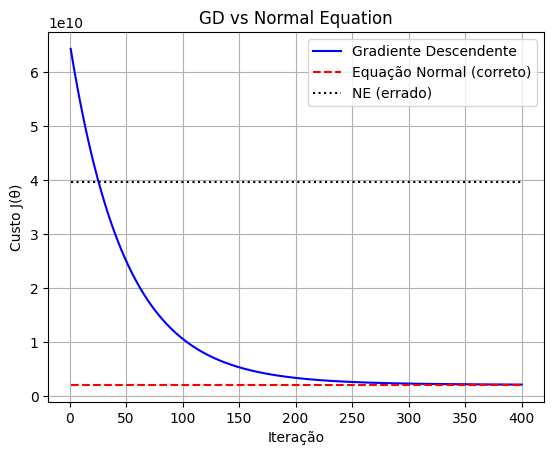

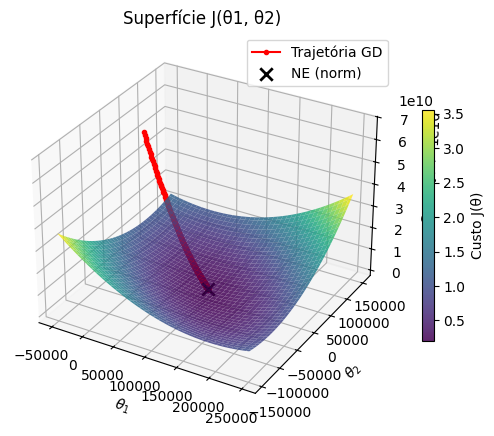

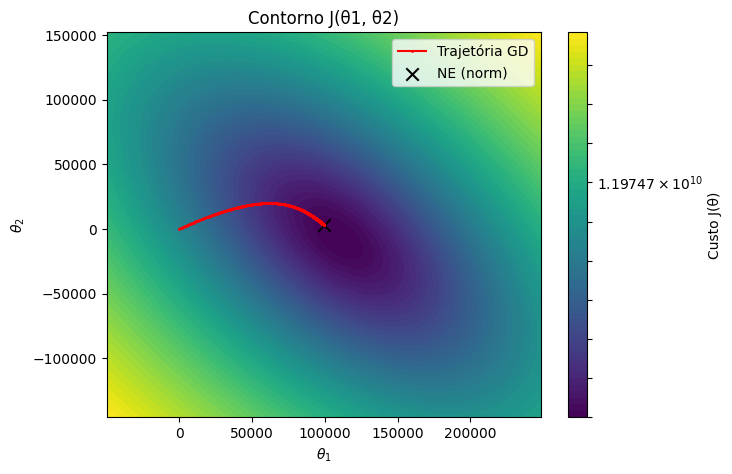

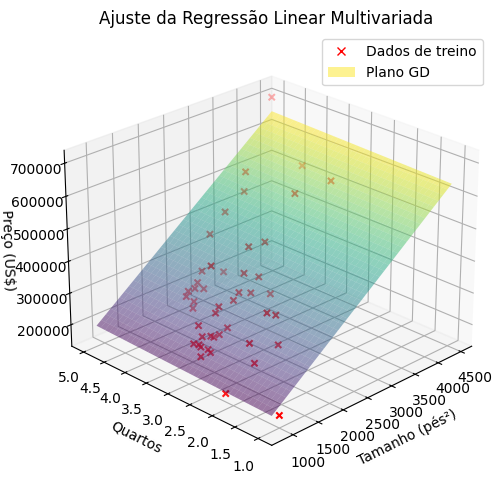

In [ ]:
# regressao-multivariada-ex.py
"""
@file regressao-multivariada-ex.py
@brief Multivariate linear regression exercise with gradient descent and normal equation.
@details Este script executa um fluxo de trabalho completo para regressão linear multivariada,
          incluindo normalização de features, cálculo de parâmetros via gradiente descendente
          e equação normal, além de comparação de custos.
@author Your Name <your.email@example.com>
"""

import numpy as np
import matplotlib.pyplot as plt
import os


def costs_from_history(X_b: np.ndarray, y: np.ndarray, thetas: np.ndarray) -> np.ndarray:
    """Calcula o custo J(θ) para cada θ em *thetas*."""
    return np.array([compute_cost_multi(X_b, y, th) for th in thetas])

def main():
    # 1) Cria pasta de figuras
    os.makedirs("Figures", exist_ok=True)

    # 2) Carrega dados
    data = np.loadtxt('ex1data2.txt', delimiter=',')
    X = data[:, :2]  # Primeiras duas colunas
    y = data[:, 2]   # Terceira coluna
    m = y.size       # Número de exemplos

    print('Primeiros 10 exemplos de treinamento:')
    print(np.column_stack((X[:10], y[:10])))

    # 3) Normaliza features
    X_norm, mu, sigma = features_normalize_by_std(X)
    X_b = np.column_stack((np.ones((X_norm.shape[0], 1)), X_norm))  # X para GD


    print('\nParâmetros de normalização:')
    print(f'Média (mu): {mu}')
    print(f'Desvio Padrão (sigma): {sigma}')

    # 4) Gradient Descent Multivariado
    alpha = 0.01
    num_iters = 400
    theta_gd =  np.zeros(X_b.shape[1]) # Inicializa theta com zeros
    print('\nRodando GD para regressão multivariada...')
    print(f'Taxa de aprendizado (α): {alpha}')
    print(f'Número de iterações: {num_iters}')
    print(f'Parâmetros iniciais (θ): {theta_gd}')

    theta_gd, J_history = gradient_descent_multi(X_b, y, theta_gd, alpha, num_iters)
    print('\nTheta via Gradient Descent:')
    print(theta_gd)

    # 4a) Plot de convergência (GD)
    plt.figure()
    plt.plot(np.arange(1, num_iters + 1), J_history, 'b-', linewidth=2)
    plt.xlabel('Iteração')
    plt.ylabel('Custo J(θ)')
    plt.title('Convergência do Gradiente (Multivariada)')
    plt.grid(True)
    plt.savefig('Figures/convergencia_custo_multi.png', dpi=300, bbox_inches='tight')
    plt.savefig('Figures/convergencia_custo_multi.svg', format='svg', bbox_inches='tight')
    plt.show()

    # 5) Predição com GD
    example = np.array([1650, 3])  # features originais
    example_norm = (example - mu) / sigma  # normaliza
    x_pred = np.concatenate(([1], example_norm))  # adiciona bias
    price_gd = x_pred @ theta_gd  # faz a predição
    print(f'\nPreço previsto (GD) para [1650,3]: ${price_gd:.2f}')

    # 6) Equação Normal
    X_ne = np.column_stack((np.ones(X.shape[0]), X))  # X original com bias
    theta_ne = normal_eqn(X_ne, y)

    example = np.array([1, 1650, 3])  # features originais com bias
    price_ne = example @ theta_ne  # faz a predição
    print('\nTheta via Equação Normal:')
    print(theta_ne)
    print(f'Preço previsto (NE) para [1650,3]: ${price_ne:.2f}')

    # --- Comparação de custos ---
    cost_ne_errado = compute_cost_multi(X_b, y, theta_ne)
    print(f'\n[CUSTO ERRADO] Custo usando θ_ne em X_NORMALIZADO (X_b): {cost_ne_errado:.2f}')

    cost_ne_correto = compute_cost_multi(X_ne, y, theta_ne)
    print(f'[CUSTO CORRETO] Custo usando θ_ne em X_ORIGINAL (X_ne): {cost_ne_correto:.2f}')

    plt.figure()
    plt.plot(np.arange(1, num_iters + 1), J_history,
             'b-', label='Gradiente Descendente')
    plt.hlines(cost_ne_correto, 1, num_iters,
               colors='r', linestyles='--',
               label='Equação Normal (correto)')
    plt.hlines(cost_ne_errado, 1, num_iters, colors='k', linestyles=':', label='NE (errado)')
    plt.xlabel('Iteração')
    plt.ylabel('Custo J(θ)')
    plt.title('GD vs Normal Equation')
    plt.legend()
    plt.grid(True)
    plt.savefig('Figures/convergencia_custo_vs_ne.png', dpi=300, bbox_inches='tight')
    plt.savefig('Figures/convergencia_custo_vs_ne.svg', format='svg', bbox_inches='tight')
    plt.show()

    # -------------- Visualizações 3D / Contorno para multivariada ----------------------------
    theta_gd, J_history, theta_history = gradient_descent_multi_with_history(
        X_b, y, np.zeros(X_b.shape[1]), alpha, num_iters
    )
    theta_ne_norm = theta_gd

    # 7) Contorno J(θ1, θ2) (θ0 fixo em θ_gd[0]). Malha de custo centrada no ótimo
    t1_hist, t2_hist = theta_history[:, 1], theta_history[:, 2]
    max_dev1 = np.max(np.abs(t1_hist - theta_ne_norm[1]))
    max_dev2 = np.max(np.abs(t2_hist - theta_ne_norm[2]))
    span1 = span2 = 1.5 * max(max_dev1, max_dev2)  # mesma escala nos 2 eixos

    t1_vals = np.linspace(theta_ne_norm[1] - span1, theta_ne_norm[1] + span1, 120)
    t2_vals = np.linspace(theta_ne_norm[2] - span2, theta_ne_norm[2] + span2, 120)
    T1, T2 = np.meshgrid(t1_vals, t2_vals)

    J_mesh = np.zeros_like(T1)
    for i in range(T1.shape[0]):
        for j in range(T1.shape[1]):
            J_mesh[i, j] = compute_cost_multi(X_b, y, [theta_ne_norm[0], T1[i, j], T2[i, j]])

    # 8) Superfície J(θ1, θ2) + trajetória GD + NE (normalizado)
    fig = plt.figure(figsize=(7, 5))
    ax = fig.add_subplot(111, projection="3d")
    surf = ax.plot_surface(T1, T2, J_mesh, cmap="viridis", alpha=0.85, linewidth=0)
    ax.plot(t1_hist, t2_hist, costs_from_history(X_b, y, theta_history), "r.-", label="Trajetória GD")
    ax.scatter(theta_ne_norm[1], theta_ne_norm[2], compute_cost_multi(X_b, y, theta_ne_norm),
               s=80, marker="x", color="black", linewidths=2, label="NE (norm)")
    fig.colorbar(surf, ax=ax, shrink=0.6, label="Custo J(θ)")
    ax.set_xlabel(r"$\theta_1$"); ax.set_ylabel(r"$\theta_2$"); ax.set_zlabel("Custo J(θ)")
    ax.set_title("Superfície J(θ1, θ2)")
    ax.view_init(elev=30, azim=-60)
    ax.legend()
    fig.savefig("Figures/superficie_GD_vs_NE.png", dpi=300)

    # 8a) Contorno J(θ1, θ2) + trajetória GD + NE (normalizado)
    from matplotlib.colors import LogNorm
    plt.figure(figsize=(7, 5))
    levels = np.logspace(np.log10(J_mesh.min()), np.log10(J_mesh.max()), 60)
    cf = plt.contourf(T1, T2, J_mesh, levels=levels, norm=LogNorm(), cmap="viridis")
    plt.colorbar(cf, label="Custo J(θ)")
    plt.plot(t1_hist, t2_hist, "r.-", ms=2, label="Trajetória GD")
    plt.scatter(theta_ne_norm[1], theta_ne_norm[2], s=80, marker="x", color="black", label="NE (norm)")
    plt.xlabel(r"$\theta_1$"); plt.ylabel(r"$\theta_2$")
    plt.title("Contorno J(θ1, θ2)"); plt.legend()
    plt.savefig("Figures/contorno_GD_vs_NE.png", dpi=300)
    plt.show()

    # 9) Plano de regressão ajustado + pontos originais (3‑D)
    fig2 = plt.figure(figsize=(7, 5))
    ax2 = fig2.add_subplot(111, projection="3d")

    # Pontos originais
    ax2.scatter(X[:, 0], X[:, 1], y, c="red", marker="x", label="Dados de treino")

    # Plano de regressão
    f1_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 40)
    f2_vals = np.linspace(X[:, 1].min(), X[:, 1].max(), 40)
    F1, F2 = np.meshgrid(f1_vals, f2_vals)

    theta_gd_orig = np.zeros_like(theta_ne)
    theta_gd_orig[1:] = theta_gd[1:] / sigma
    theta_gd_orig[0] = theta_gd[0] - np.sum((mu / sigma) * theta_gd[1:])

    Z = theta_gd_orig[0] + theta_gd_orig[1] * F1 + theta_gd_orig[2] * F2
    surf2 = ax2.plot_surface(
        F1, F2, Z, alpha=0.5, cmap="viridis", rstride=1, cstride=1
    )

    ax2.set_xlabel("Tamanho (pés²)")
    ax2.set_ylabel("Quartos")
    ax2.set_zlabel("Preço (US$)")
    ax2.set_title("Ajuste da Regressão Linear Multivariada")
    ax2.view_init(elev=25, azim=-135)

    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch
    handles = [
        Line2D([], [], color="red", marker="x", linestyle="", label="Dados de treino"),
        Patch(facecolor=surf2.get_facecolor()[0], edgecolor="none", alpha=0.5, label="Plano GD"),
    ]
    ax2.legend(handles=handles)
    fig2.tight_layout()
    fig2.savefig("Figures/ajuste_regressao_multivariada.png", dpi=300)
    plt.show()

if __name__ == '__main__':
    main()